<a href="https://colab.research.google.com/github/aryanshu/Basic-ML-Projects/blob/master/Visualization_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Ananlysis of Kaggle's problem - "House Prices: Advanced Regression Techniques."

**This Notebook Prepared with Keeping the concept  in the mind about Machine learning Pipeline .So , First of all we are going to create all seperate module which is a part of ML pipeline , After that we are going to connect them to form a proper ML pipeline.**

**Parts of pipeline:**<br>
**1. [Data Analysis](#scrollTo=DvqjWu1uoOz_&line=1&uniqifier=1)**<br>
**2. [Feature Engineering](#scrollTo=cHr_wN2bMkhQ&line=2&uniqifier=1)**<br>
**3. [Feature Scaling](#scrollTo=WcvGVmv5-3dV&line=2&uniqifier=1)**<br>
**4. [Feature Selection](#scrollTo=b3cKINlrwCqt&line=1&uniqifier=1)**<br>
**4. [Model selection](#scrollTo=tz0slNh0CC46&line=1&uniqifier=1)**<br><br>



## 1 . Data analysis : 
It Involves Visualizing and analysis of all data , remember that we are only doing analysis here , after analysis we will start working on the other parts of the pipeline.In this part we are trying to understand relationship between different features.   

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'lightgrey'})
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [5]:
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print('Size of Dataset :{} rows'.format(len(df)))
print('Number of columns :{} '.format(len(df.columns)))

Size of Dataset :1460 rows
Number of columns :81 


**Calculating Percentage of Missing Value feature wise , remember that we only doing analysis here**

In [9]:
data=df.copy()
feature_na=[feature for feature in data.columns if data[feature].isnull().sum()>1 ]
print("number of colummns with nan value: {}\n".format(len(feature_na)))

for feature in feature_na:
  print('% of null value in {} = {}%'.format(feature,data[feature].isnull().sum()*100/len(data)))


number of colummns with nan value: 18

% of null value in LotFrontage = 17.73972602739726%
% of null value in Alley = 93.76712328767124%
% of null value in MasVnrType = 0.547945205479452%
% of null value in MasVnrArea = 0.547945205479452%
% of null value in BsmtQual = 2.5342465753424657%
% of null value in BsmtCond = 2.5342465753424657%
% of null value in BsmtExposure = 2.6027397260273974%
% of null value in BsmtFinType1 = 2.5342465753424657%
% of null value in BsmtFinType2 = 2.6027397260273974%
% of null value in FireplaceQu = 47.26027397260274%
% of null value in GarageType = 5.5479452054794525%
% of null value in GarageYrBlt = 5.5479452054794525%
% of null value in GarageFinish = 5.5479452054794525%
% of null value in GarageQual = 5.5479452054794525%
% of null value in GarageCond = 5.5479452054794525%
% of null value in PoolQC = 99.52054794520548%
% of null value in Fence = 80.75342465753425%
% of null value in MiscFeature = 96.3013698630137%


**Finding Out Numerical features**

In [10]:
numeric_features = [feature for feature in data.columns if not data[feature].dtype =='O' ]
print('Number of Numerical Features : {}\n'.format(len(numeric_features)))
print(numeric_features)


Number of Numerical Features : 38

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


**There are some Temporal Features within Numerical features**

In [11]:
temp_features=[feature for feature in numeric_features if 'yr' in feature.lower() or 'year' in feature.lower()]
temp_features 

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [12]:
data['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

**Showing Irrelevency of temporal features without some mathemetical operation** **As we can see instead of increasing selling price of houses there is a decrease over the years**

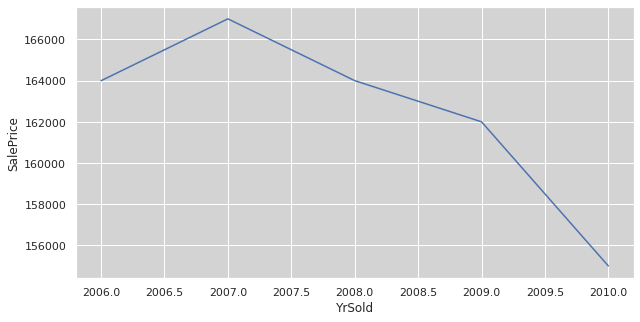

In [14]:
data=df.copy()
data.groupby(['YrSold'])['SalePrice'].median().plot(figsize=(10,5))
plt.ylabel('SalePrice')
plt.show()

**Plot after doing some feature engineering in temporal features**

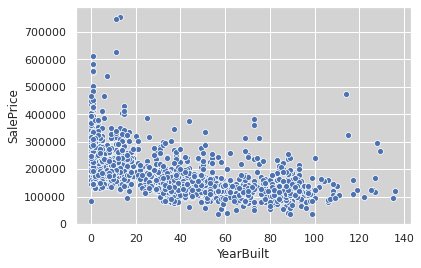

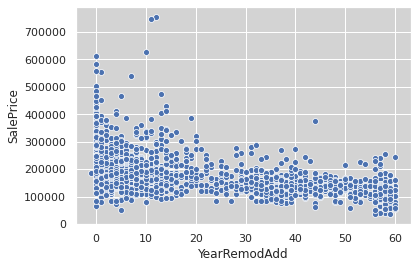

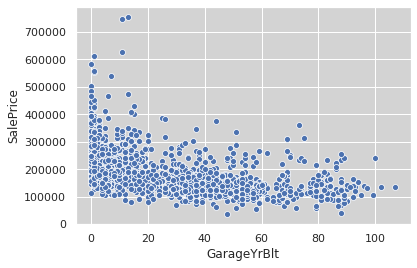

In [15]:
data=df.copy()
for feature in temp_features:
  if feature != 'YrSold':
    data[feature]=data['YrSold']-data[feature]
    sns.scatterplot(x=data[feature],y=data['SalePrice'] )
    plt.show()

In [16]:
new_numeric_features = [feature for feature in numeric_features if feature not in temp_features+['Id'] ]
print('Number of Numerical feature without temporal : {}'.format(len(new_numeric_features)))
new_numeric_features

Number of Numerical feature without temporal : 33


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

**Discrete features**

In [24]:
data=df.copy()
discrete_features=[feature for feature in new_numeric_features if len(data[feature].unique())<25]
print('Number of Discrete Features : {}\n'.format(len(discrete_features)))
discrete_features

Number of Discrete Features : 17



['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

**There are some continuos feature in numerical.**

In [20]:
continous_features = list(set(new_numeric_features)-set(discrete_features))
print('number of continous feature {}'.format(len(continous_features)))
continous_features

number of continous feature 16


['2ndFlrSF',
 'MasVnrArea',
 'LotFrontage',
 'BsmtFinSF1',
 'OpenPorchSF',
 'GrLivArea',
 'LotArea',
 'WoodDeckSF',
 'EnclosedPorch',
 'TotalBsmtSF',
 'GarageArea',
 'SalePrice',
 'BsmtUnfSF',
 'ScreenPorch',
 'BsmtFinSF2',
 '1stFlrSF']

**Ploting all discrete feature against Saleprice to analyize the relationship and pattern between them.**

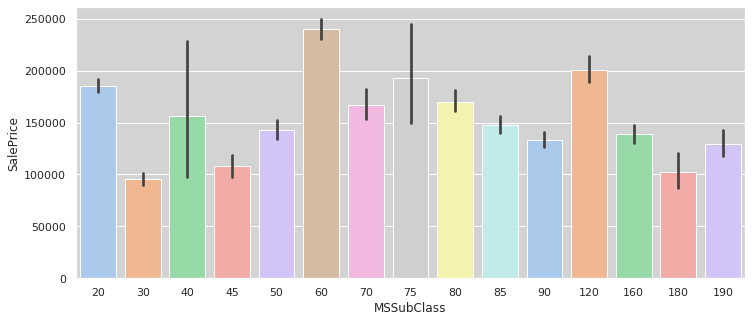

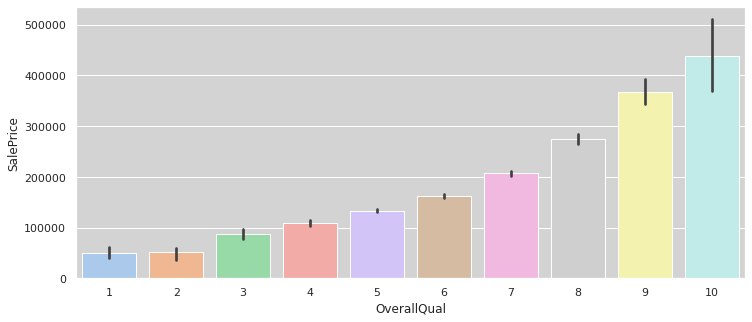

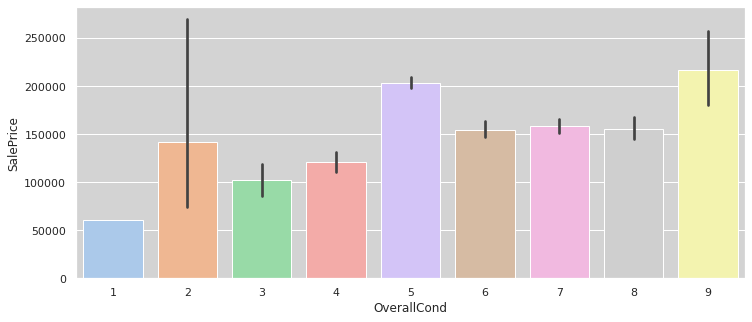

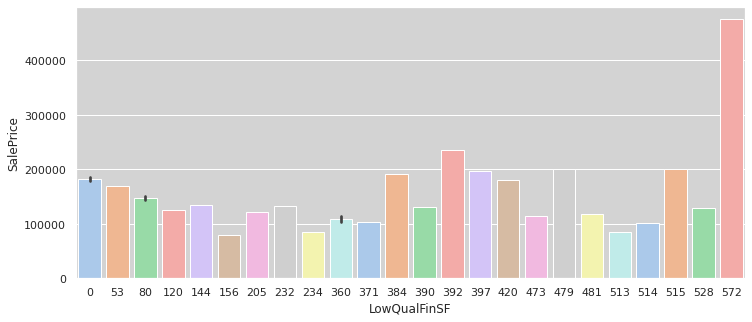

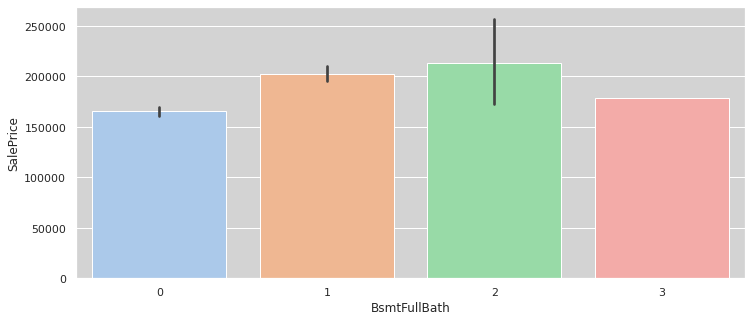

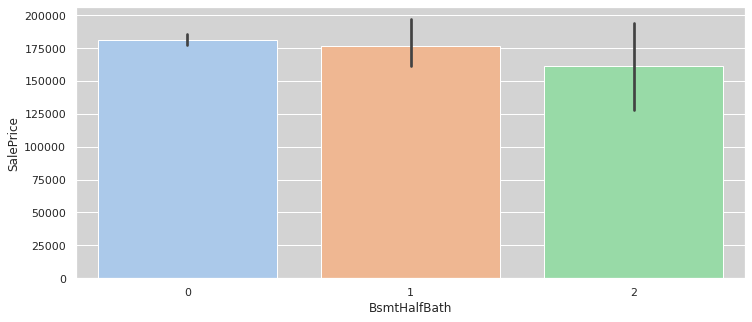

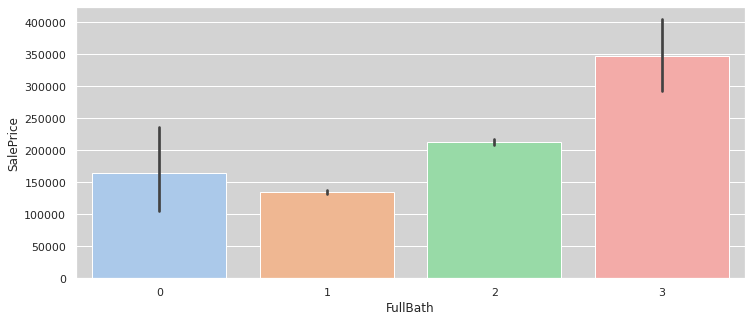

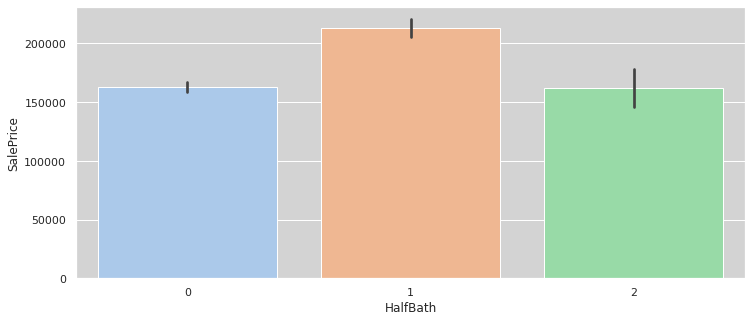

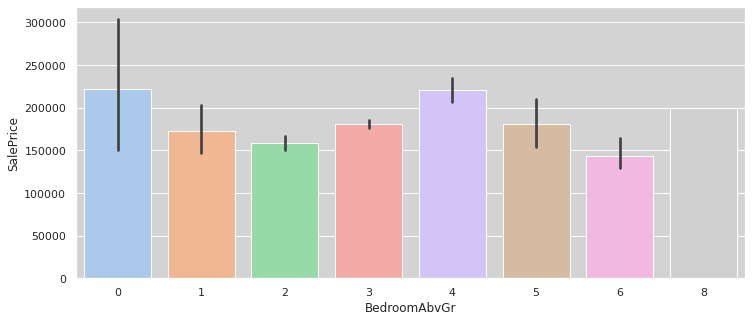

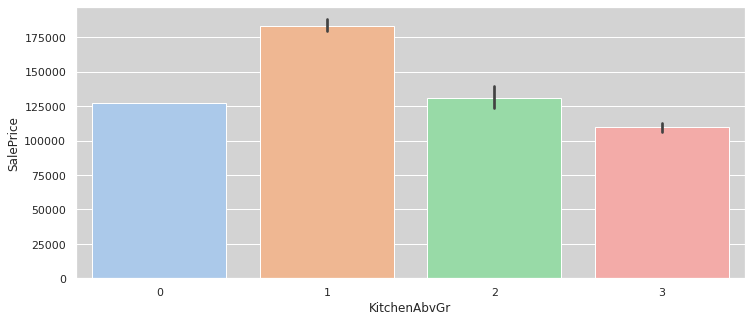

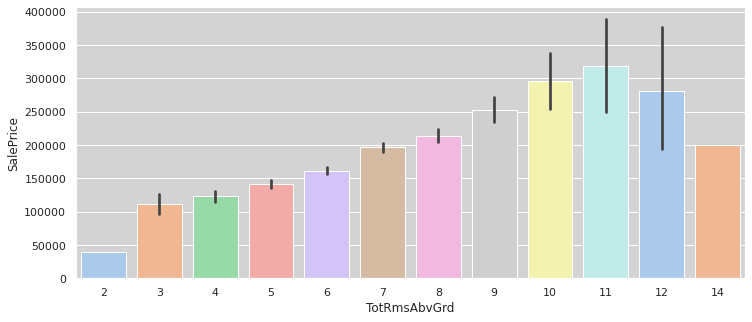

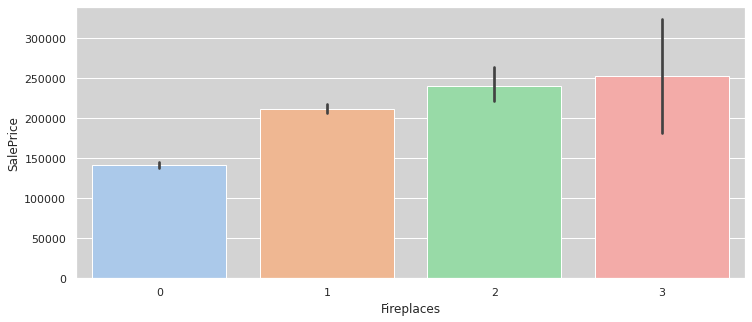

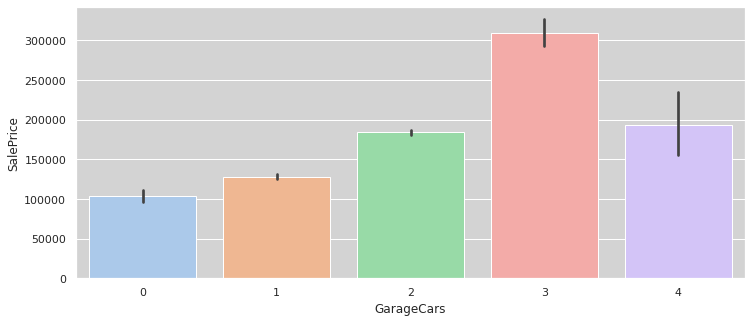

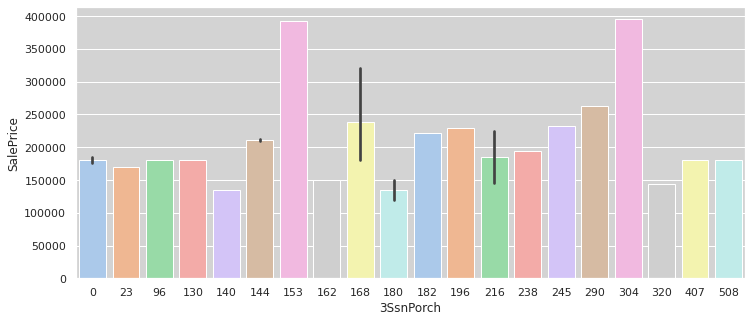

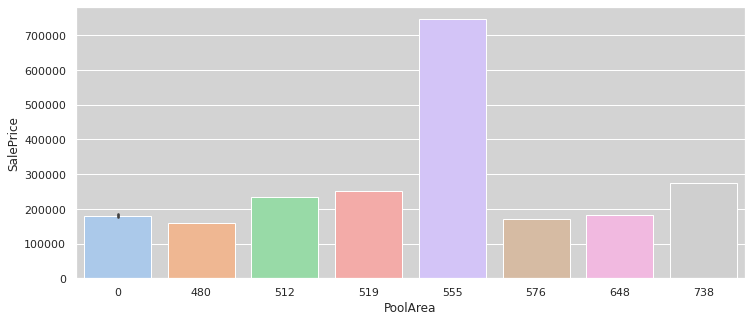

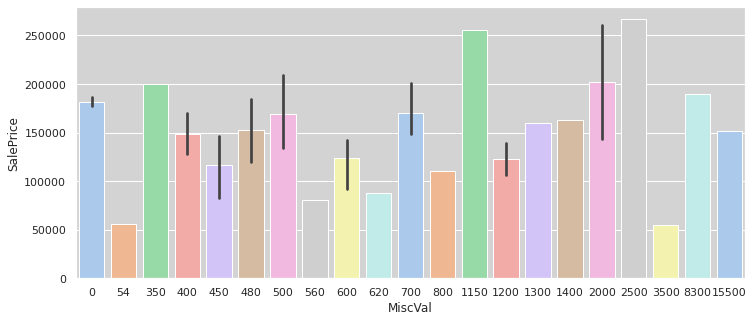

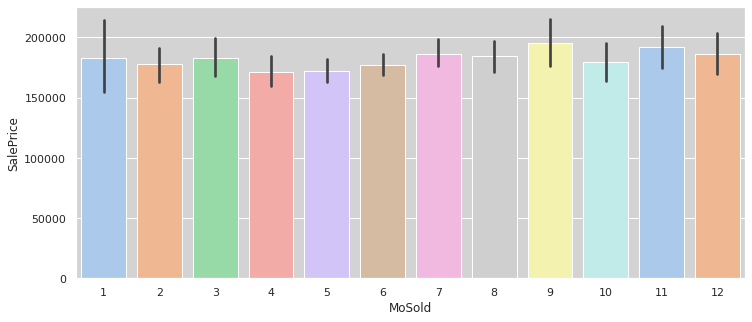

In [25]:
for feature in discrete_features:
  plt.figure(figsize=(12,5))
  sns.barplot(x=data[feature],y=data['SalePrice'] ,palette='pastel' )
  

**Plotting some numerical features to see wheather they following the gaussian distribution(or normal distribution or not)**

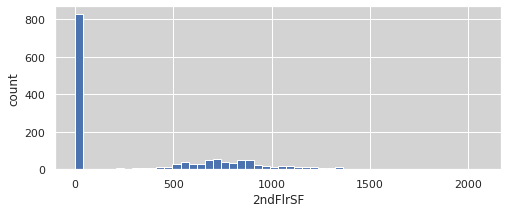

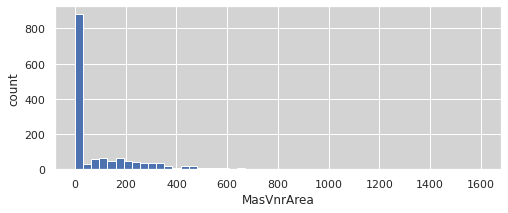

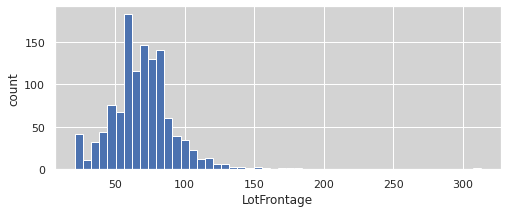

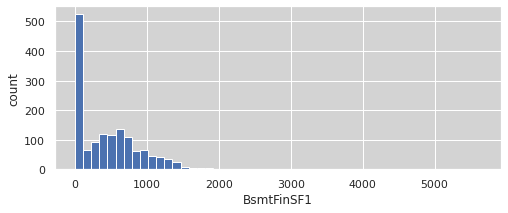

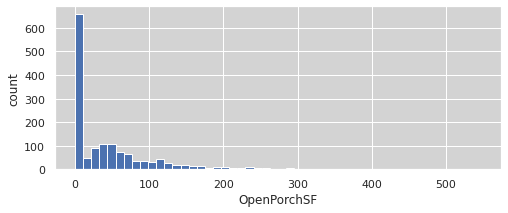

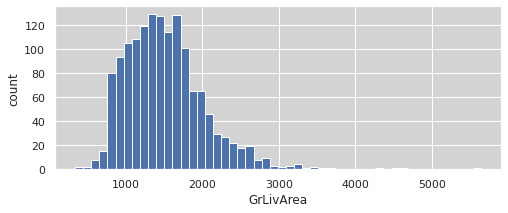

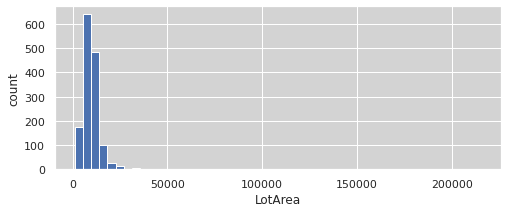

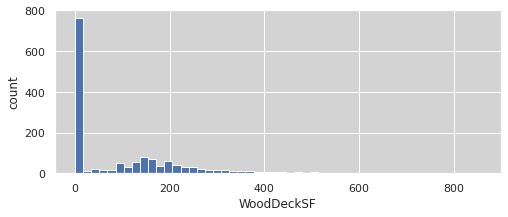

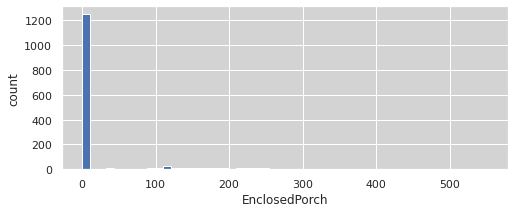

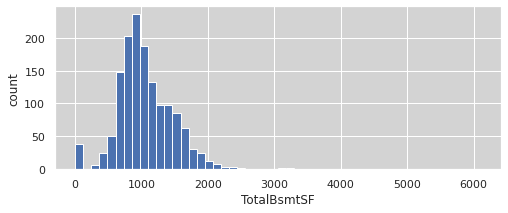

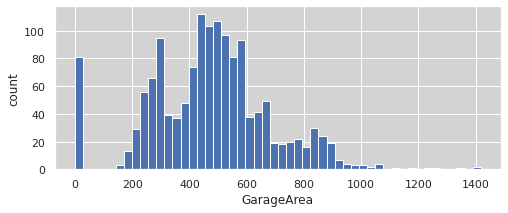

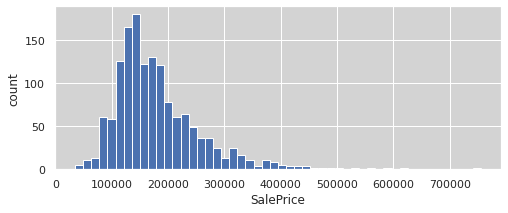

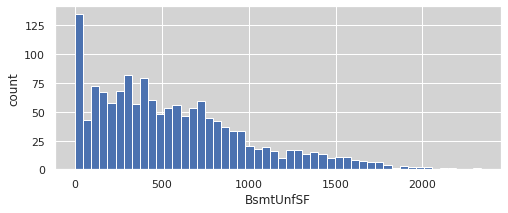

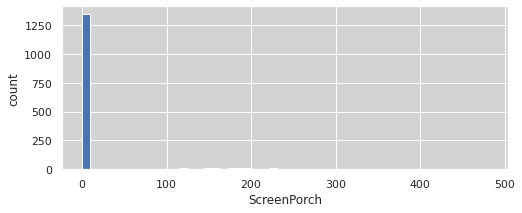

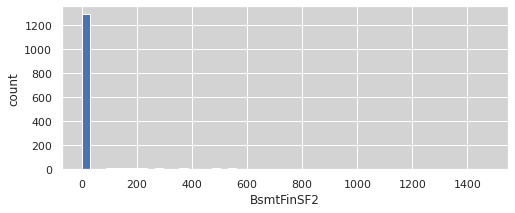

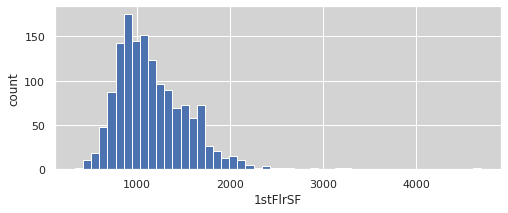

In [27]:
for feature in continous_features:
  plt.figure(figsize=(8,3))
  data[feature].hist(bins=50 )
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.show()

**As we can see here are lot of feature not following the normal or gausssin distribution** **.So we going to apply logarithmic transform operation to transform them into normal distributed form.**

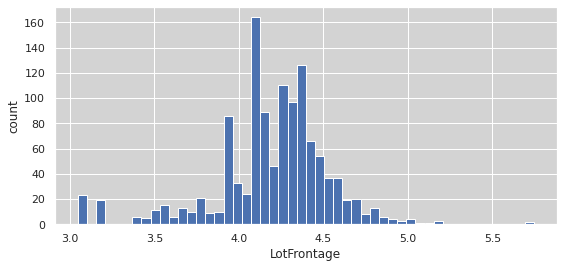

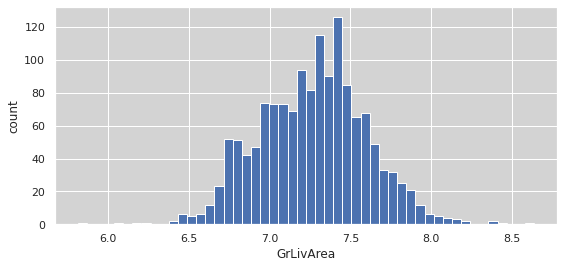

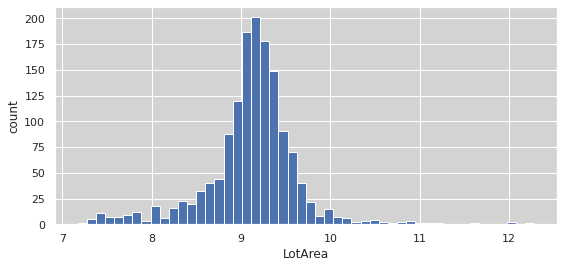

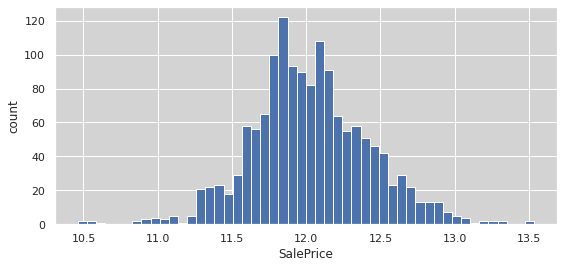

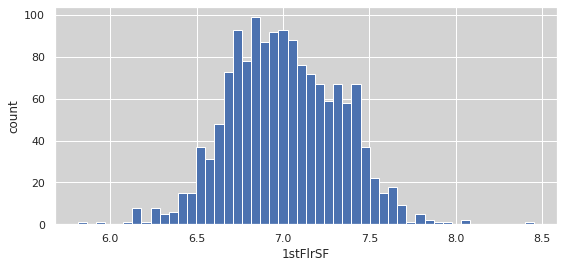

In [29]:
for feature in continous_features:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])  
    plt.figure(figsize=(9,4))
    data[feature].hist(bins=50 )
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

**Plotting Continous numerical features to observe the pattern**

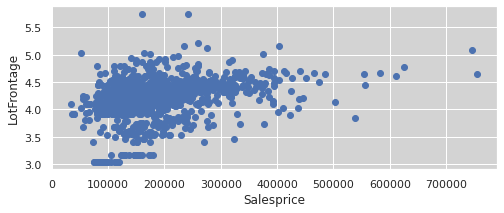

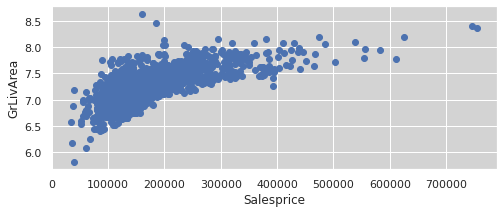

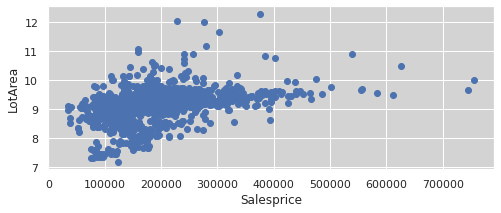

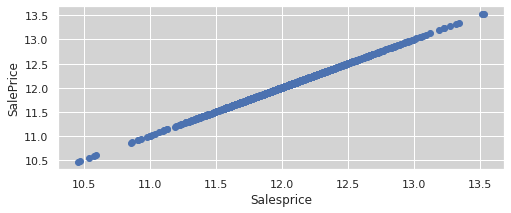

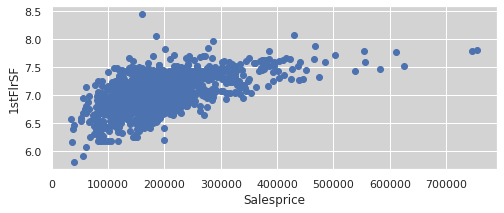

In [33]:
for feature in continous_features:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])  
    plt.figure(figsize=(8,3))
    
    plt.scatter(x=data["SalePrice"],y=data[feature])
    plt.xlabel('Salesprice')
    plt.ylabel(feature)
    plt.show()

**Try to visualize Outliers in the dataset by boxplot**

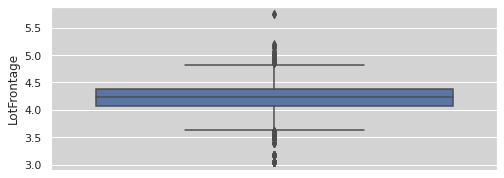

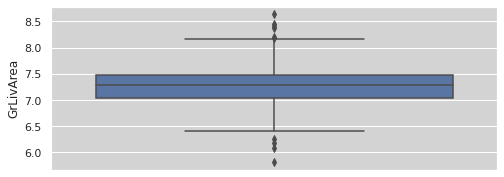

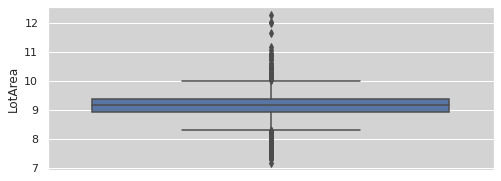

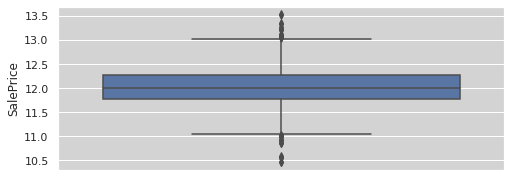

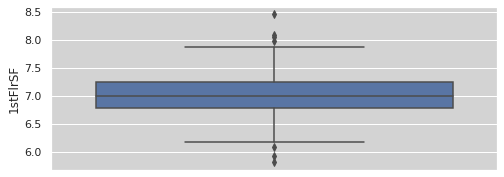

In [32]:
for feature in continous_features:
  data=df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]=np.log(data[feature])  
    plt.figure(figsize=(8,3))

    sns.boxplot(y=feature , data=data)

    plt.show()

## Categorical Features

In [34]:
data=df.copy()
categorical_features=[feature for feature in data.columns if data[feature].dtype =='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

**Plotting categorical feature against Saleprice , so we can find out some pattern**

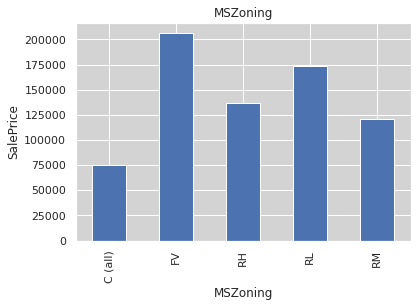

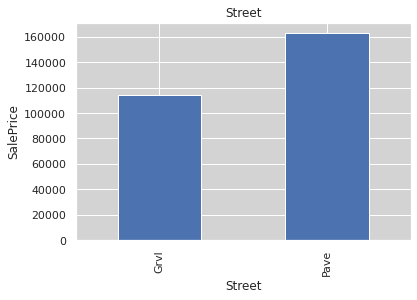

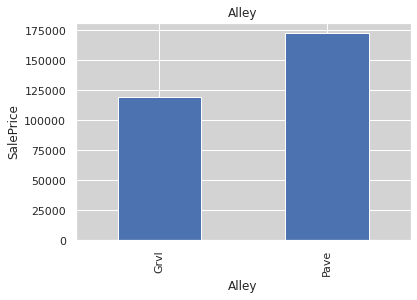

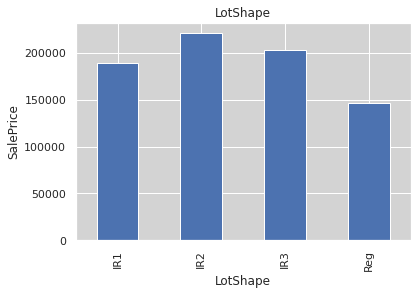

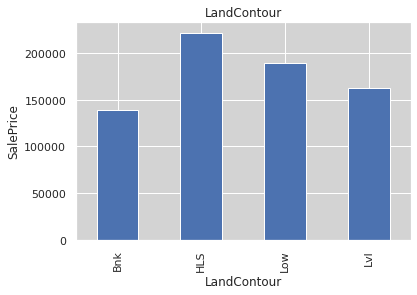

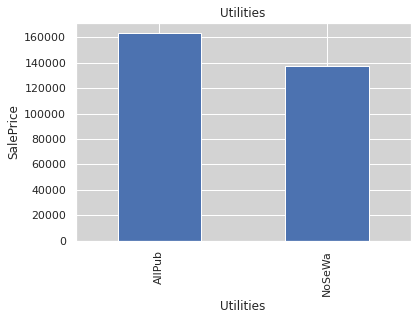

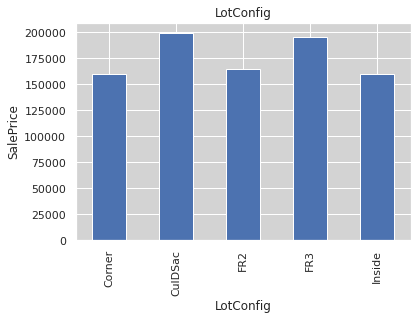

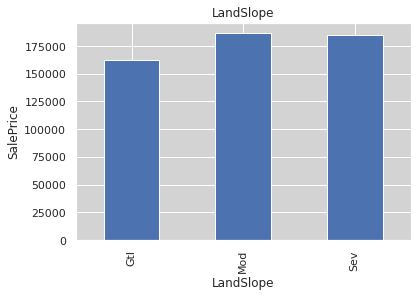

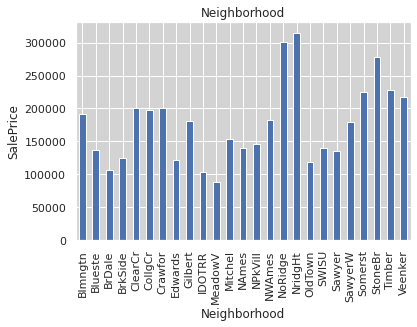

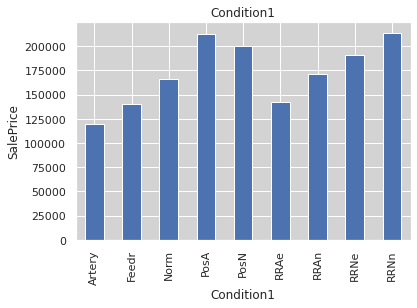

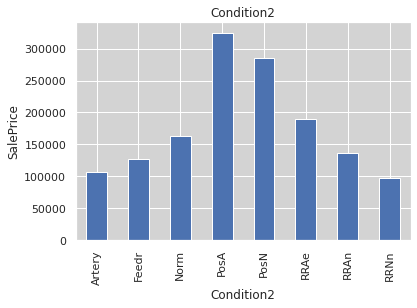

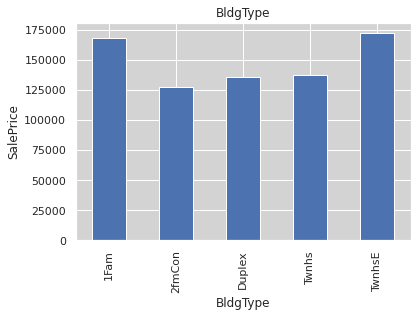

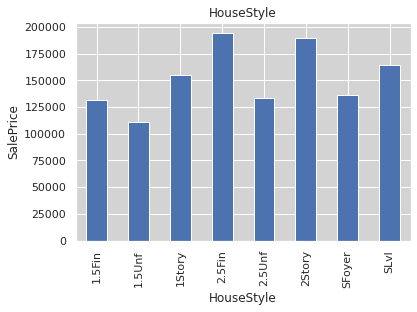

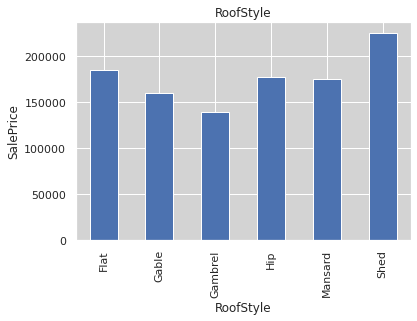

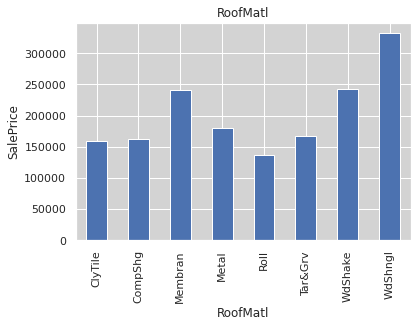

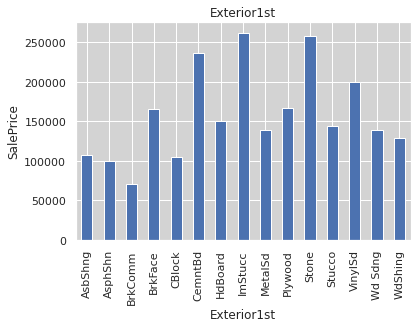

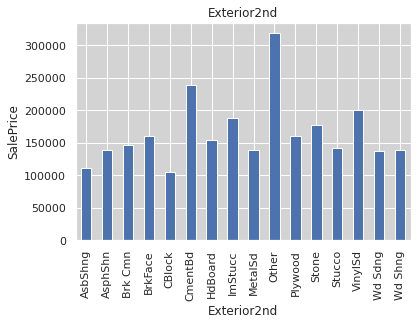

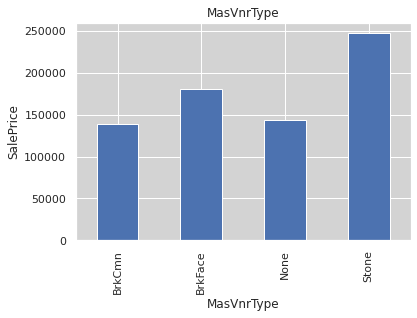

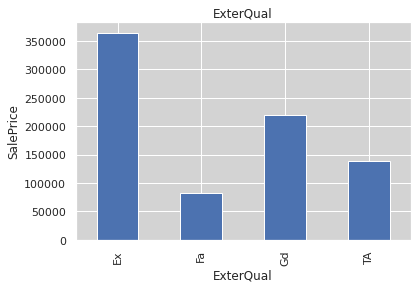

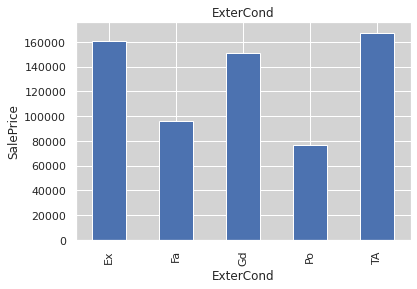

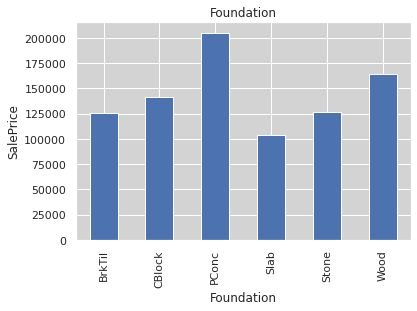

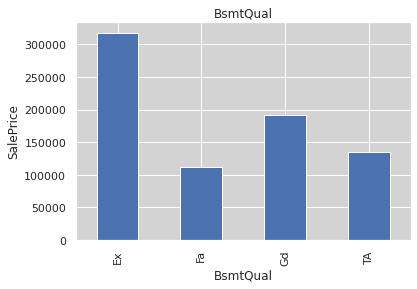

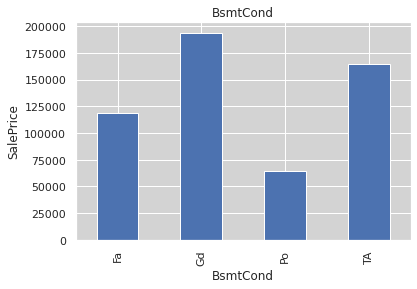

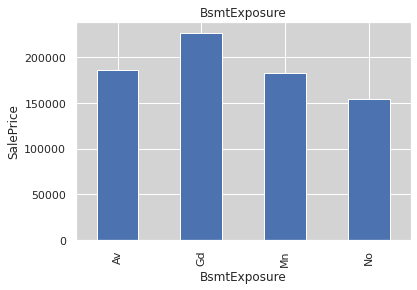

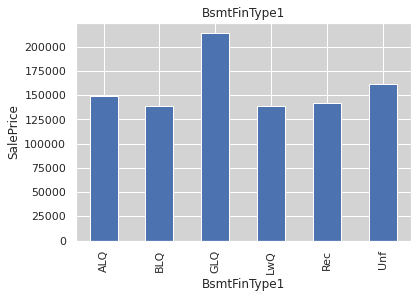

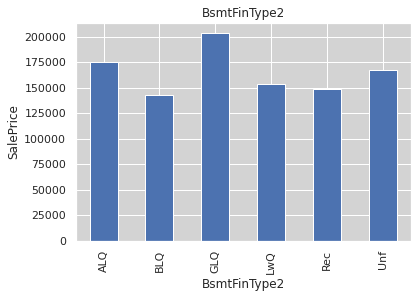

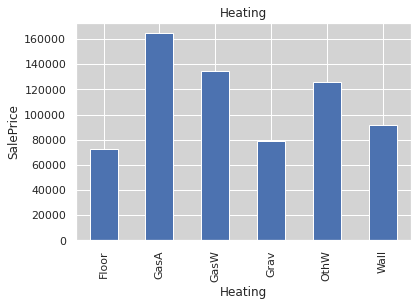

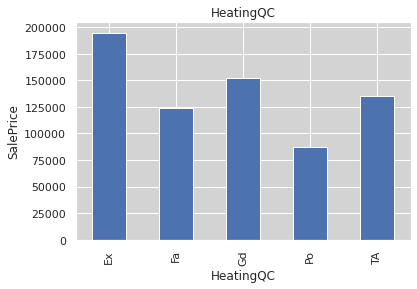

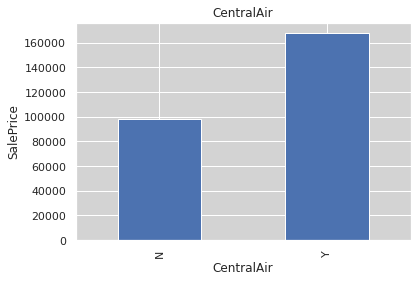

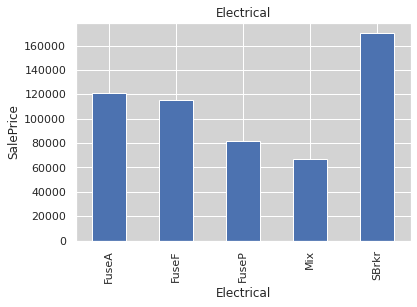

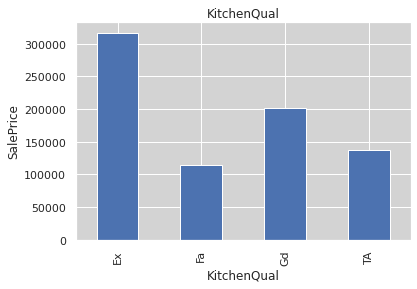

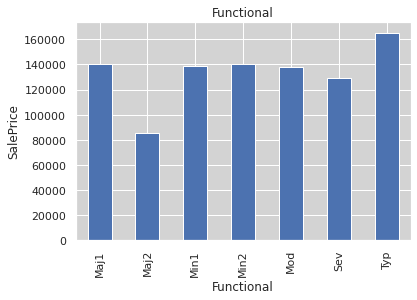

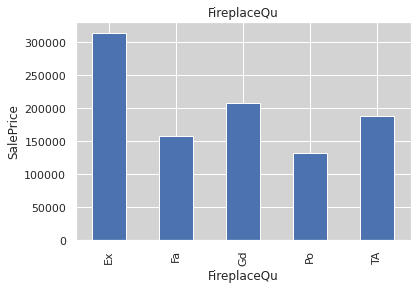

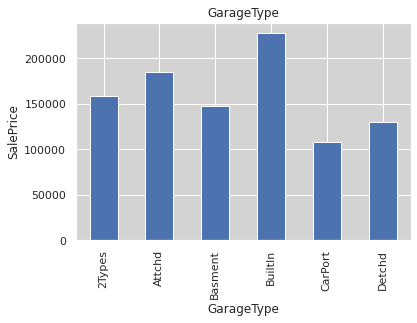

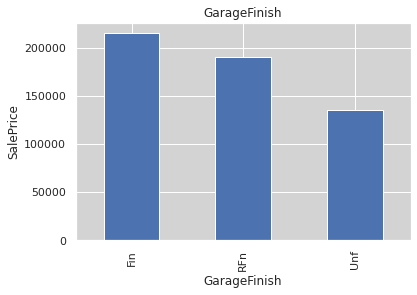

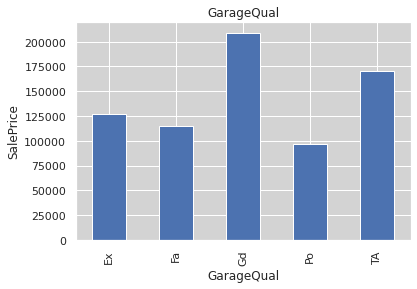

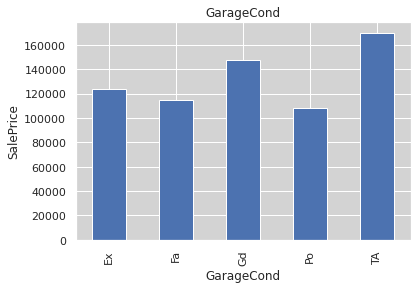

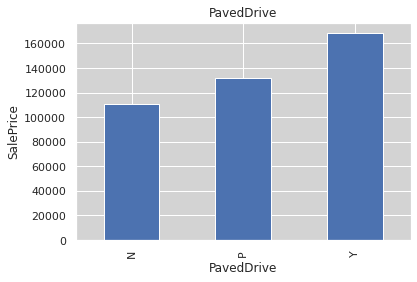

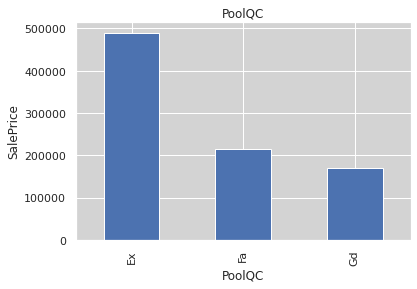

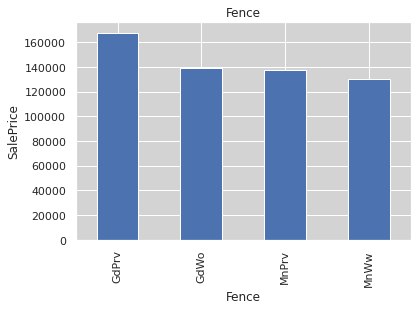

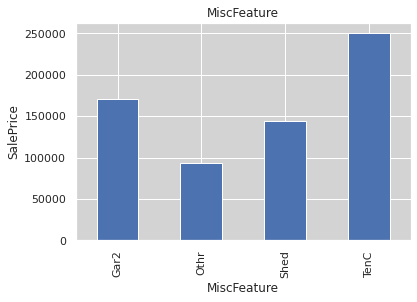

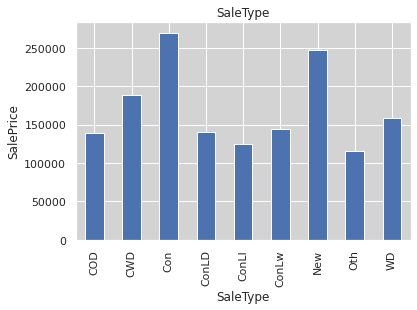

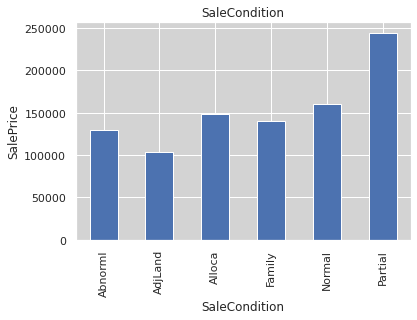

In [0]:

for feature in categorial_features:
  data=df.copy()
  data.groupby(feature)['SalePrice'].median().plot.bar()
  plt.xlabel(feature)
  plt.ylabel('SalePrice')
  plt.title(feature)
  plt.show()

## 2. Feature Engineering
**It includes handling missing values , transforming dataset into normal distributed form , handling categorical values and a lot of different other operations, what we were realized during Data Analysis .** 

In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

**As I want to make all module parts of pipelines independent of each other . So It may be possible that there are some operation like reading file done multiple times during the whole operation.**  

**I concatneted the train and test data together so i dont have to perform same operation twice .**

In [36]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
df1=train.copy()
df2=test.copy()
df2['SalePrice']=0
df=pd.concat([df1,df2],axis=0)
df.reset_index(drop=True,inplace=True)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
data=df.copy()
categorical_features=[feature for feature in data.columns if data[feature].dtype =='O']

**Categorical feature with missing value.**

In [40]:
categorical_features_nan=[feature for feature in categorical_features if data[feature].isnull().sum()>1 ]
print(len(categorical_features_nan))
categorical_features_nan

18


['MSZoning',
 'Alley',
 'Utilities',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

**Replcaing with label 'Missing'.**

In [43]:
for feature in categorical_features_nan :
  data[feature].fillna('Missing',inplace=True)
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [0]:
numeric_features = [feature for feature in data.columns if not data[feature].dtype =='O' ]
temp_features=[feature for feature in numeric_features if 'yr' in feature.lower() or 'year' in feature.lower()]
new_numeric_features=list(set(numeric_features)-set(temp_features+['Id']))

**Handling numerical feature missing value.**

In [45]:
new_numeric_features_nan = [feature for feature in new_numeric_features if data[feature].isnull().sum()>1]
for feature in new_numeric_features_nan:
  nan_value=data[feature].median()
  data[feature+'nan']=np.where(data[feature].isnull(),1,0)
  data[feature].fillna(nan_value,inplace=True)
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrAreanan,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0,0


In [46]:
temp_features=[feature for feature in numeric_features if 'yr' in feature.lower() or 'year' in feature.lower()]
temp_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [0]:
for feature in temp_features:
  data[feature]=data['YrSold']-data[feature]


In [48]:
data[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,0
1,31,31,31.0,0
2,7,6,7.0,0
3,91,36,8.0,0
4,8,8,8.0,0
...,...,...,...,...
2914,36,36,NaN,0
2915,36,36,36.0,0
2916,46,10,46.0,0
2917,14,14,NaN,0


In [0]:
for feature in temp_features:
  nan_value=df[feature].median()
  data[feature+'nan']=np.where(data[feature].isnull(),1,0)
  data[feature].fillna(nan_value,inplace=True)


**Dealing with numerical feature which 0 in them we cannot handle them with logarithmic otransformation unless 0 remove or replaced.** 

In [49]:
gauss_numeric_feature=[feature for feature in new_numeric_features if 0 not in data[feature].unique() and feature != 'SalePrice']
gauss_numeric_feature

['OverallCond',
 'LotFrontage',
 'GrLivArea',
 'TotRmsAbvGrd',
 '1stFlrSF',
 'OverallQual',
 'MoSold',
 'LotArea',
 'MSSubClass']

In [51]:
for feature in gauss_numeric_feature:
  data[feature]=np.log(data[feature])
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrAreanan,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
0,1,4.094345,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,2,1,3,1,Gd,2.079442,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,0.693147,0,WD,Normal,208500,0,0,0,0,0,0,0,0
1,2,2.995732,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.791759,2.079442,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,2,0,3,1,TA,1.791759,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,1.609438,0,WD,Normal,181500,0,0,0,0,0,0,0,0
2,3,4.094345,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,2,1,3,1,Gd,1.791759,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,2.197225,0,WD,Normal,223500,0,0,0,0,0,0,0,0
3,4,4.248495,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,1,0,3,1,Gd,1.945910,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,0.693147,0,WD,Abnorml,140000,0,0,0,0,0,0,0,0
4,5,4.094345,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,2,1,4,1,Gd,2.197225,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,2.484907,0,WD,Normal,250000,0,0,0,0,0,0,0,0


In [0]:
ext_gauss_feature=list(set(new_numeric_features) - set(gauss_numeric_feature)-{'SalePrice'})
ext_gauss_feature

['BsmtFinSF2',
 'PoolArea',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'MiscVal',
 'GarageCars',
 'BsmtUnfSF',
 'OpenPorchSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'GarageArea',
 '3SsnPorch',
 'BedroomAbvGr',
 'WoodDeckSF',
 'MasVnrArea',
 'ScreenPorch',
 'HalfBath',
 'BsmtFinSF1',
 'FullBath',
 'TotalBsmtSF',
 'EnclosedPorch',
 'Fireplaces',
 '2ndFlrSF']

In [0]:
for feature in ext_gauss_feature:
  data[feature]=data[feature].replace([0],1)
  data[feature]=np.log(data[feature])
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrAreanan,LotFrontagenan,BsmtHalfBathnan,BsmtFullBathnan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
0,1,4.094345,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.278115,Gd,TA,PConc,Gd,TA,No,GLQ,6.559615,Unf,0.0,5.010635,6.752270,GasA,...,0.693147,0.0,1.098612,0.0,Gd,2.079442,Typ,0.0,Missing,Attchd,5.0,RFn,0.693147,6.306275,TA,TA,Y,0.000000,4.110874,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,0.693147,0,WD,Normal,208500,0,0,0,0,0,0,0,0
1,2,2.995732,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1.791759,2.079442,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.885510,Unf,0.0,5.648974,7.140453,GasA,...,0.693147,0.0,1.098612,0.0,TA,1.791759,Typ,0.0,TA,Attchd,31.0,RFn,0.693147,6.131226,TA,TA,Y,5.697093,0.000000,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,1.609438,0,WD,Normal,181500,0,0,0,0,0,0,0,0
2,3,4.094345,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,1.945910,1.609438,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.087596,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.186209,Unf,0.0,6.073045,6.824374,GasA,...,0.693147,0.0,1.098612,0.0,Gd,1.791759,Typ,0.0,TA,Attchd,7.0,RFn,0.693147,6.410175,TA,TA,Y,0.000000,3.737670,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,2.197225,0,WD,Normal,223500,0,0,0,0,0,0,0,0
3,4,4.248495,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1.945910,1.609438,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.375278,Unf,0.0,6.291569,6.628041,GasA,...,0.000000,0.0,1.098612,0.0,Gd,1.945910,Typ,0.0,Gd,Detchd,8.0,Unf,1.098612,6.464588,TA,TA,Y,0.000000,3.555348,5.605802,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,0.693147,0,WD,Abnorml,140000,0,0,0,0,0,0,0,0
4,5,4.094345,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2.079442,1.609438,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.857933,Gd,TA,PConc,Gd,TA,Av,GLQ,6.484635,Unf,0.0,6.194405,7.043160,GasA,...,0.693147,0.0,1.386294,0.0,Gd,2.197225,Typ,0.0,TA,Attchd,8.0,RFn,1.098612,6.728629,TA,TA,Y,5.257495,4.430817,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,2.484907,0,WD,Normal,250000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,5.075174,RM,3.044522,7.568379,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,1.386294,1.945910,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.0,6.302619,6.302619,GasA,...,0.000000,0.0,1.098612,0.0,TA,1.609438,Typ,0.0,Missing,Missing,1979.0,Missing,0.000000,0.000000,Missing,Missing,Y,0.000000,0.000000,0.000000,0.0,0.0,0.0,Missing,Missing,Missing,0.00000,1.791759,0,WD,Normal,0,0,0,0,0,0,0,1,0
2915,2916,5.075174,RM,3.044522,7.546446,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,N

**Handling categorical feature by converting them into numerical form.**

In [52]:
for feature in categorial_features:
    labels_ordered=data.groupby([feature])['LotFrontage'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)
    
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrAreanan,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
0,1,4.094345,4,4.174387,9.041922,0,2,1,0,0,2,0,15,3,1,4,4,1.945910,1.609438,5,5,1,0,9.0,11.0,1,196.0,1,2,3,1,2,0,4,706.0,1,0.0,150.0,856.0,2,...,2,1,3,1,2.0,2.079442,2,0,0,4,5.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,0,0,0,0.693147,0,4.0,1,208500,0,0,0,0,0,0,0,0
1,2,2.995732,4,4.382027,9.169518,0,2,1,0,0,0,0,12,5,1,4,5,1.791759,2.079442,31,31,1,0,1.0,3.0,0,0.0,0,2,2,1,2,4,1,978.0,1,0.0,284.0,1262.0,2,...,2,0,3,1,0.0,1.791759,2,1,3,4,31.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,0,0,0,1.609438,0,4.0,1,181500,0,0,0,0,0,0,0,0
2,3,4.094345,4,4.219508,9.328123,0,2,2,0,0,2,0,15,3,1,4,4,1.945910,1.609438,7,6,1,0,9.0,11.0,1,162.0,1,2,3,1,2,1,4,486.0,1,0.0,434.0,920.0,2,...,2,1,3,1,2.0,1.791759,2,1,3,4,7.0,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,0,0,0,2.197225,0,4.0,1,223500,0,0,0,0,0,0,0,0
3,4,4.248495,4,4.094345,9.164296,0,2,2,0,0,4,0,13,3,1,4,4,1.945910,1.609438,91,36,1,0,6.0,4.0,0,0.0,0,2,0,2,3,0,1,216.0,1,0.0,540.0,756.0,2,...,1,0,3,1,2.0,1.945910,2,1,4,1,8.0,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,0,0,0,0.693147,0,4.0,2,140000,0,0,0,0,0,0,0,0
4,5,4.094345,4,4.430817,9.565214,0,2,2,0,0,0,0,24,3,1,4,4,2.079442,1.609438,8,8,1,0,9.0,11.0,1,350.0,1,2,3,1,2,2,4,655.0,1,0.0,490.0,1145.0,2,...,2,1,4,1,2.0,2.197225,2,1,3,4,8.0,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,0,0,0,2.484907,0,4.0,1,250000,0,0,0,0,0,0,0,0


## 3. Feature Scaling:
**It involves dealing the range of different features by normalizing them.**

In [53]:
feature_scale=[feature for feature in data.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

**transform the train and test set, and add on the Id and SalePrice variables**

In [0]:

data = pd.concat([data[['Id','SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [55]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MasVnrAreanan,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
0,1,208500,0.487992,0.8,0.418208,0.366344,0.0,1.0,0.333333,0.0,0.0,0.5,0.0,0.625000,0.375,0.142857,1.0,0.571429,0.845098,0.732487,0.043796,0.112903,0.2,0.0,0.642857,0.733333,0.25,0.12250,0.333333,0.5,0.6,0.25,0.50,0.00,0.666667,0.125089,0.166667,0.0,0.064212,0.140098,...,0.0,0.50,0.5,0.375,0.333333,0.666667,0.688020,0.285714,0.00,0.0,0.666667,0.094080,0.666667,0.4,0.368280,0.6,0.6,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278943,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,181500,0.000000,0.8,0.495064,0.391317,0.0,1.0,0.333333,0.0,0.0,0.0,0.0,0.500000,0.625,0.142857,1.0,0.714286,0.778151,0.946395,0.233577,0.532258,0.2,0.0,0.071429,0.200000,0.00,0.00000,0.000000,0.5,0.4,0.25,0.50,1.00,0.166667,0.173281,0.166667,0.0,0.121575,0.206547,...,0.5,0.50,0.0,0.375,0.333333,0.000000,0.545243,0.285714,0.25,0.6,0.666667,0.106012,0.666667,0.4,0.309140,0.6,0.6,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.647685,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,223500,0.487992,0.8,0.434909,0.422359,0.0,1.0,0.666667,0.0,0.0,0.5,0.0,0.625000,0.375,0.142857,1.0,0.571429,0.845098,0.732487,0.058394,0.129032,0.2,0.0,0.642857,0.733333,0.25,0.10125,0.333333,0.5,0.6,0.25,0.50,0.25,0.666667,0.086109,0.166667,0.0,0.185788,0.150573,...,0.0,0.50,0.5,0.375,0.333333,0.666667,0.545243,0.285714,0.25,0.6,0.666667,0.094998,0.666667,0.4,0.408602,0.6,0.6,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.884228,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,140000,0.556464,0.8,0.388581,0.390295,0.0,1.0,0.666667,0.0,0.0,1.0,0.0,0.541667,0.375,0.142857,1.0,0.571429,0.845098,0.732487,0.671533,0.612903,0.2,0.0,0.428571,0.266667,0.00,0.00000,0.000000,0.5,0.0,0.50,0.75,0.00,0.166667,0.038271,0.166667,0.0,0.231164,0.123732,...,0.0,0.25,0.0,0.375,0.333333,0.666667,0.621749,0.285714,0.25,0.8,0.166667,0.095457,0.333333,0.6,0.431452,0.6,0.6,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.278943,0.0,0.5,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,250000,0.487992,0.8,0.513123,0.468761,0.0,1.0,0.666667,0.0,0.0,0.0,0.0,1.000000,0.375,0.142857,1.0,0.571429,0.903090,0.732487,0.065693,0.161290,0.2,0.0,0.642857,0.733333,0.25,0.21875,0.333333,0.5,0.6,0.25,0.50,0.50,0.666667,0.116052,0.166667,0.0,0.209760,0.187398,...,0.0,0.50,0.5,0.500,0.333333,0.666667,0.746476,0.285714,0.25,0.6,0.666667,0.095457,0.666667,0.6,0.561828,0.6,0.6,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data.to_csv('X_train.csv',index=False)

## 4. Feature Selection

In [0]:
df=pd.read_csv('X_train.csv')
df1=pd.read_csv('train.csv')
data=df.copy()

**Correlation between different features to do the feature seletion**

In [58]:
data.corr()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MasVnrAreanan,LotFrontagenan,BsmtFullBathnan,BsmtHalfBathnan,YearBuiltnan,YearRemodAddnan,GarageYrBltnan,YrSoldnan
Id,1.000000,-0.739838,0.007826,-0.011374,-0.028267,-0.024000,-0.002961,-0.005593,-0.008802,0.011302,0.010028,-0.010583,-0.029079,-0.025893,-0.001582,0.005361,-0.008746,-0.012864,-0.034261,-0.004175,0.005458,0.034327,-0.009798,-0.024905,-0.024999,-0.026550,-0.019145,-0.026737,-0.007592,-0.007881,-0.014749,0.004986,0.001758,0.020010,-0.007746,-0.016947,0.011755,0.018251,-0.014453,-0.024924,...,0.010243,-0.009946,-0.015358,0.003074,-0.011702,-0.020054,-0.025009,0.032375,-0.035236,-0.038401,0.004487,-0.001119,-0.006567,-0.010208,-0.008865,-0.017208,-0.009658,-0.048409,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.003227,0.002386,-0.021437,0.008244,0.000334,NaN,0.021632,0.020833,0.032505,-0.022688,0.021597,0.021597,NaN,NaN,-0.001867,NaN
SalePrice,-0.739838,1.000000,-0.014488,0.119901,0.146226,0.173795,-0.015324,0.043905,0.064684,0.030051,-0.018258,-0.013593,0.050380,0.139418,-0.012418,-0.000182,0.050822,0.036582,0.276333,-0.004271,-0.192742,-0.211119,0.107109,0.078571,0.099771,0.092344,0.141947,0.186306,0.223783,-0.001888,0.142112,0.073582,0.002931,0.108356,0.055442,0.148461,-0.052380,-0.019288,0.092956,0.238754,...,-0.019217,0.203831,0.110381,0.068632,-0.043996,0.239034,0.229997,-0.048119,0.194668,0.220649,0.170564,-0.095414,0.203600,0.235003,0.231297,0.114201,0.103677,0.119938,0.123457,0.105112,-0.060763,0.046599,0.026102,0.050913,0.061411,-0.072404,-0.019659,-0.017902,0.047526,NaN,0.125390,0.114975,-0.006893,0.026434,-0.022253,-0.022253,NaN,NaN,-0.085338,NaN
MSSubClass,0.007826,-0.014488,1.000000,-0.310514,-0.426098,-0.421833,-0.003882,-0.167687,-0.049452,-0.020162,-0.027644,-0.044715,-0.028405,-0.312194,-0.038141,0.009806,-0.657831,-0.371930,0.083405,-0.039521,-0.000442,-0.052033,-0.183656,-0.019868,-0.118681,-0.136869,-0.048362,-0.000610,0.020141,0.030282,0.005420,-0.124638,-0.035675,0.030617,-0.025767,-0.117109,-0.099530,-0.094717,-0.114284,-0.271380,...,0.005010,0.191522,0.277284,0.081959,0.246998,0.007305,0.125326,-0.045036,-0.009420,0.002240,-0.087219,0.084524,-0.012553,-0.015097,-0.085212,-0.087197,-0.093320,-0.044763,-0.001911,0.008092,0.005783,-0.045136,-0.044274,0.006543,0.004771,-0.118680,-0.036458,-0.034395,0.013981,NaN,-0.031438,-0.050357,-0.012986,-0.007739,-0.029446,-0.029446,NaN,NaN,0.088242,NaN
MSZoning,-0.011374,0.119901,-0.310514,1.000000,0.410171,0.465710,-0.010358,0.285382,0.208466,0.039994,0.023990,-0.032331,0.024233,0.563039,0.023203,-0.005466,0.307478,0.236296,0.163328,-0.092929,-0.354081,-0.136277,0.122099,0.045042,0.190720,0.258809,0.150183,0.111561,0.110075,0.039556,0.310172,0.023137,0.104839,0.133534,0.072649,0.191956,0.082604,0.084581,0.028607,0.259418,...,0.040170,0.168344,0.091836,0.120371,-0.074186,0.138447,0.151617,0.007291,0.208971,0.196482,0.382798,-0.134216,0.248398,0.223257,0.225944,0.169654,0.174082,0.240604,0.162455,0.028132,-0.163254,0.014730,0.054339,0.032153,0.028257,0.006807,0.040168,0.021734,0.000607,NaN,0.055323,0.034625,0.009010,0.112893,-0.021775,-0.021775,NaN,NaN,-0.121678,NaN
LotFrontage,-0.028267,0.146226,-0.426098,0.410171,1.000000,0.687425,0.038166,0.214246,0.153005,0.051887,0.020937,0.228046,0.041857,

**Plot correlation matrix between sale price and some feature as plotting 80 feature coming out as blurr**

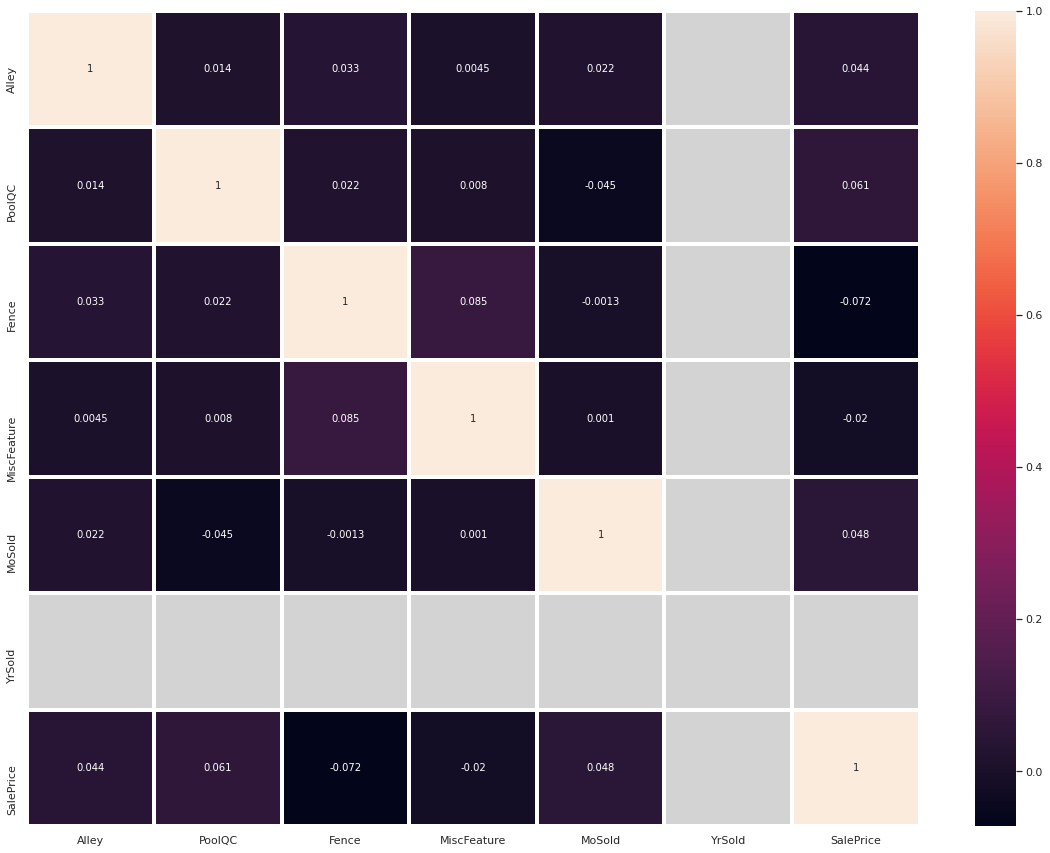

In [59]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(data[['Alley','PoolQC','Fence','MiscFeature','MoSold','YrSold','SalePrice']].corr(), annot=True , linewidths=3)
plt.show()

**selecting some irrellevent feature which have less correlation or high missing values**

In [0]:
selected_feat_2=['Alley','PoolQC','Fence','MiscFeature']

In [0]:
train_data=data[:len(df1)].drop(['SalePrice'],axis=1)
test_data=data[len(df1):].drop(['SalePrice'],axis=1)

In [62]:
data['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
2914         0
2915         0
2916         0
2917         0
2918         0
Name: SalePrice, Length: 2919, dtype: int64

In [63]:
salePrice=data['SalePrice'][:len(df1)]
salePrice=pd.DataFrame(salePrice)
salePrice

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


**Creating test and train datasets but it's not include in feature selection but we are doing it anyway**

In [0]:
x_train,x_test,y_train,y_test=train_test_split(train_data,salePrice,test_size=.05)

In [65]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 442 to 1172
Data columns (total 88 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               1387 non-null   int64  
 1   MSSubClass       1387 non-null   float64
 2   MSZoning         1387 non-null   float64
 3   LotFrontage      1387 non-null   float64
 4   LotArea          1387 non-null   float64
 5   Street           1387 non-null   float64
 6   Alley            1387 non-null   float64
 7   LotShape         1387 non-null   float64
 8   LandContour      1387 non-null   float64
 9   Utilities        1387 non-null   float64
 10  LotConfig        1387 non-null   float64
 11  LandSlope        1387 non-null   float64
 12  Neighborhood     1387 non-null   float64
 13  Condition1       1387 non-null   float64
 14  Condition2       1387 non-null   float64
 15  BldgType         1387 non-null   float64
 16  HouseStyle       1387 non-null   float64
 17  OverallQual 

In [0]:
x_train.fillna(1,inplace=True)

**We are using Lasso regression to do feature selection more effective way.**

In [0]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [69]:
feature_sel_model = SelectFromModel(Lasso(alpha=1, random_state=0)) 
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=1, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

**It giving us sme irrelevent feature it can seen by using below code.**

In [71]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False, False, False, False,  True, False])

In [72]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 88
selected features: 81


In [73]:
selected_feat=list(set(selected_feat)-set(selected_feat_2))
len(selected_feat)

77

In [74]:
x_train=x_train[selected_feat]
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1387 entries, 442 to 1172
Data columns (total 77 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MasVnrArea      1387 non-null   float64
 1   Condition2      1387 non-null   float64
 2   ExterCond       1387 non-null   float64
 3   GarageYrBlt     1387 non-null   float64
 4   TotRmsAbvGrd    1387 non-null   float64
 5   BsmtExposure    1387 non-null   float64
 6   LotFrontagenan  1387 non-null   float64
 7   RoofStyle       1387 non-null   float64
 8   ExterQual       1387 non-null   float64
 9   OverallQual     1387 non-null   float64
 10  BsmtCond        1387 non-null   float64
 11  GarageType      1387 non-null   float64
 12  MoSold          1387 non-null   float64
 13  YearBuilt       1387 non-null   float64
 14  Functional      1387 non-null   float64
 15  PoolArea        1387 non-null   float64
 16  LandContour     1387 non-null   float64
 17  GarageCars      1387 non-null  

In [0]:
x_test=x_test[selected_feat]

# 5. Model Selection :
**It involves finding out the best algorithm for your dataset.**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score as cvs

**Accuracy metric doesn't not have much relevance here but still using it for fun.**

**Applying Linear regression model**

In [78]:
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
scores=cvs(Linear_model,x_train,y_train,cv=10)
print("accuracy of linearRegressor "+str(scores.mean()))

accuracy of linearRegressor 0.7788284371957327


In [0]:
y_predict=Linear_model.predict(x_test)

**Using RMSE( root mean squred error )as Final metric for evaluation.**

In [95]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = np.sqrt(np.square(np.asarray(np.log(y_predict)-np.log(y_test))).sum()/float(len(y_predict)))
rms

4.872495520564474

**Applying XGboost**

In [79]:
from xgboost import XGBRegressor
xgb_model=XGBRegressor()
xgb_model.fit(x_train,y_train)



[12:38:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [80]:
xgb_model.score(x_test,y_test)

0.897228241728848

In [0]:
y_predict=xgb_model.predict(x_test)

In [0]:
y_test=list(y_test['SalePrice'])

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = np.sqrt(np.square(np.asarray(np.log(y_predict)-np.log(y_test))).sum()/float(len(y_predict)))
rms

0.10709076436959927

In [0]:
test_data=test_data[selected_feat]

In [0]:
y_predicted=xgb_model.predict(test_data)

In [0]:
submission=pd.read_csv('sample_submission.csv')

In [87]:
submission['SalePrice']=y_predicted
submission.set_index(['Id'],inplace=True)
submission

,SalePrice
Id,
1461,125185.421875
1462,158625.156250
1463,173233.515625
1464,186024.640625
1465,199287.734375
...,...
2915,77307.187500
2916,82887.328125
2917,169073.578125


In [0]:
submission.to_csv('submission_new9.csv')

In [0]:
import pickle as pkl
file='xgb_model_2.pkl'
pkl.dump(xgb_model,open(file,'wb'))
